In [1]:
import numpy as np
import cv2

Debugging code for line 95 in `get_players_pos` function of `player_detection` script.

In [2]:
predicted_masks = np.load('../debugging_arrays/detectron_predicted_masks.npy')
indices = np.load("../debugging_arrays/detectron_indices.npy")
kernel = np.load("../debugging_arrays/get_players_pos_kernel.npy")
ppl = []

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [3]:
for i, entry in enumerate(indices):  # picking only class 0 (people)
    if entry == 0:
        ppl.append(
            np.array(cv2.erode(np.array(predicted_masks[i], dtype=np.uint8), kernel, iterations=4), dtype=bool))

In [4]:
mylist = [np.array(np.where(p == True)).T for p in ppl]

In [5]:
# Exact pixel locations for the mask of each person
mylist[0][:5]

array([[ 144, 1208],
       [ 144, 1209],
       [ 144, 1210],
       [ 144, 1211],
       [ 144, 1212]])

In [6]:
# The mask for each person is different so we can't create an array out of it
for x in mylist:
    print(x.shape)

(5111, 2)
(1856, 2)
(3561, 2)
(508, 2)
(2438, 2)
(2347, 2)
(901, 2)
(1940, 2)
(445, 2)
(4360, 2)


In [7]:
# indexes_ppl = np.array(
#     [np.array(np.where(p == True)).T for p in ppl])

In [8]:
PAD = 15
for keypoint, p in zip(mylist, ppl):

    top = min(keypoint[:, 0])
    bottom = max(keypoint[:, 0])
    left = min(keypoint[:, 1])
    right = max(keypoint[:, 1])
    bbox_person = (top - PAD, left - PAD, bottom + PAD, right + PAD)
    tmp_tensor = p.reshape((p.shape[0], p.shape[1], 1))
    break

In [9]:
print(top, bottom, left, right)
print(bbox_person)
print(tmp_tensor.shape)
print(ppl[0].shape)

144 319 1181 1247
(129, 1166, 334, 1262)
(400, 1280, 1)
(400, 1280)


In [32]:
bbox1 = np.array((top, bottom, left, right)).reshape((1, 4))
bbox2 = np.array((1,2,3,4)).reshape((1,4))
bbox3 = np.array((6,7,8,9)).reshape((1,4))

In [30]:
final_boxes = np.concatenate((bbox1, bbox2), axis = 0)

In [33]:
final_boxes = np.concatenate((final_boxes, bbox3), axis=0)

In [34]:
final_boxes

array([[ 144,  319, 1181, 1247],
       [   1,    2,    3,    4],
       [   6,    7,    8,    9]])

In [35]:
final = np.array()

TypeError: array() missing required argument 'object' (pos 0)

In [73]:
bboxes = np.load("../debugging_arrays/player_bboxes_padded.npy")

In [74]:
frame = cv2.imread("../debugging_images/player_detection_frame1.png")
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

In [75]:
x_min = bboxes[:,0].reshape(10,1)
y_min = bboxes[:,1].reshape(10,1)
height = (bboxes[:,2] - bboxes[:,0]).reshape(10,1)
width = (bboxes[:,3] - bboxes[:,1]).reshape(10,1)

In [76]:
bboxes_formatted = np.concatenate((y_min, x_min, width, height), axis=1)

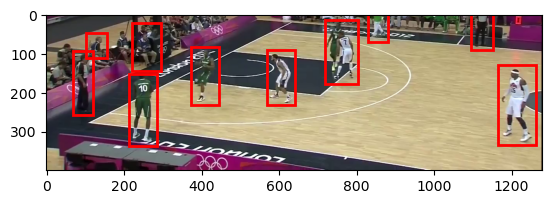

In [77]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axes
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(frame)

# Plot each bounding box
for bbox in bboxes_formatted:
    # Create a Rectangle patch
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
    
    # Add the rectangle to the Axes
    ax.add_patch(rect)

plt.show()